## MOKWEBO BRK
## 201441684
## Predictive Analytics Assignment 2


### Time Series Analysis of Daily Steps Data

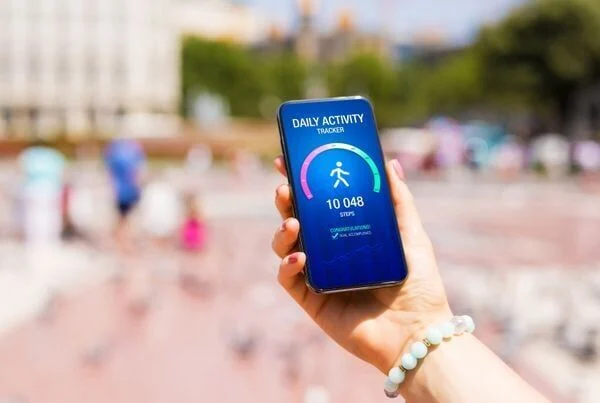

In [120]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
from datetime import datetime
import datetime as d
import calendar
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 1. Data Preparation

### This is a list to store DataFrames per csv file

In [121]:
stepsData_df = pd.DataFrame({})

### Looping through each csv file

In [122]:
for k in range(1, 16):
    path = 'Steps' + str(k) + '.csv'
    temp_df = pd.read_csv(path)
    stepsData_df = pd.concat([stepsData_df, temp_df], axis=0)

### Checking the last 5 contents of the dataset

In [123]:
stepsData_df.tail()

,Date,Actual,Goal
23,Jul 20 2023,8393,6500
24,Jul 21 2023,5954,6500
25,Jul 22 2023,9550,6500
26,Jul 23 2023,5157,6500
27,Jul 24 2023,8923,6500


### Converting Date to the appropriate date format

In [124]:
stepsData_df['Date'] = pd.to_datetime(stepsData_df['Date'])

### Showing Date data after being converted

In [125]:
stepsData_df.head()

,Date,Actual,Goal
0,2022-05-31,0,8000
1,2022-06-01,0,8000
2,2022-06-02,0,8000
3,2022-06-03,1102,8000
4,2022-06-04,1254,8000


### Setting the index to the date column

In [126]:
stepsData_df.set_index('Date', inplace=True)

### Showing indexed data to the date column

In [127]:
stepsData_df.head()

,Actual,Goal
Date,,
2022-05-31,0,8000
2022-06-01,0,8000
2022-06-02,0,8000
2022-06-03,1102,8000
2022-06-04,1254,8000


### Handling missing values

In [128]:
stepsData_df['Actual'] = stepsData_df['Actual'].replace(0, np.nan)

In [129]:
stepsData_df['Actual'].bfill(inplace = True)

### Rounding off the values in the "Actual" column to the nearest whole number

In [130]:
stepsData_df['Actual'] = stepsData_df['Actual'].round()

In [131]:
stepsData_df.head()

,Actual,Goal
Date,,
2022-05-31,1102.0,8000
2022-06-01,1102.0,8000
2022-06-02,1102.0,8000
2022-06-03,1102.0,8000
2022-06-04,1254.0,8000


## 2. Exploratory Data Analysis (EDA)

### Time Series Plot

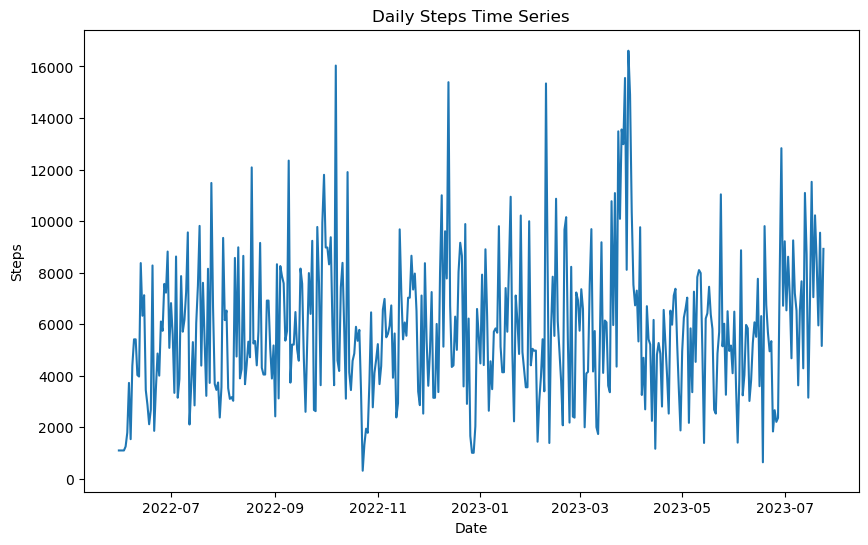

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(stepsData_df["Actual"])
plt.title("Daily Steps Time Series")
plt.xlabel("Date")
plt.ylabel("Steps")
plt.show()

### Create a new column for the month

In [82]:
stepsData_df['Month'] = stepsData_df.index.month

### Box plot to show/visualize how steps are distributed across every month

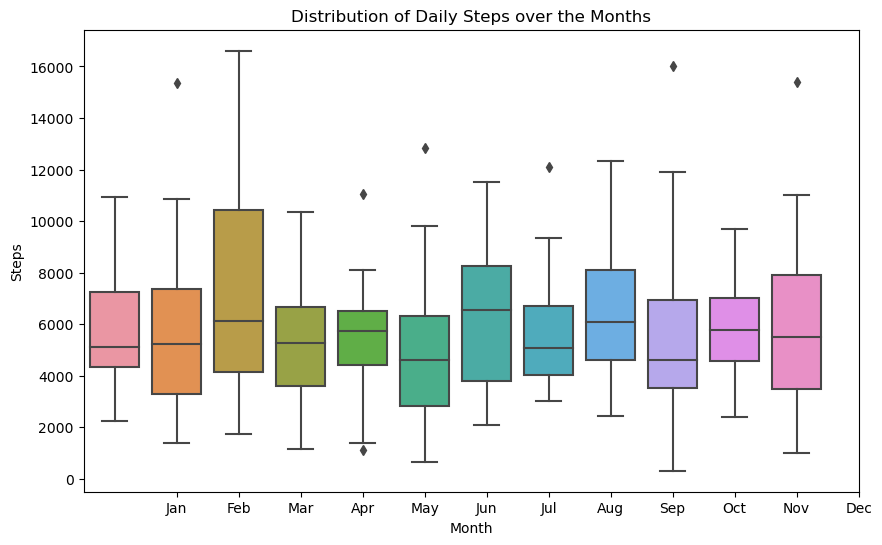

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=stepsData_df, x='Month', y='Actual')
plt.title('Distribution of Daily Steps over the Months')
plt.xlabel('Month')
plt.ylabel('Steps')
plt.xticks(np.arange(1, 13), calendar.month_abbr[1:])
plt.show()

### Histogram that shows the frequency of the daily steps

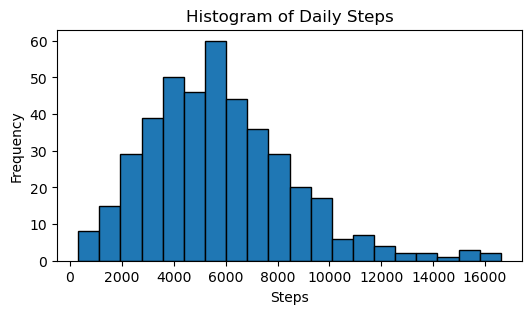

In [84]:
plt.figure(figsize=(6, 3))
plt.hist(stepsData_df['Actual'], bins=20, edgecolor='black')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Steps')
plt.show()

### Box plot to show distribution and outliers in the data

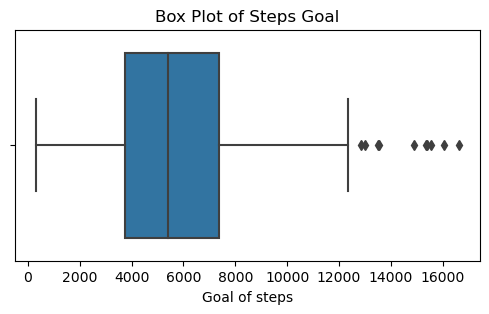

In [85]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=stepsData_df['Actual'])
plt.xlabel('Goal of steps')
plt.title('Box Plot of Steps Goal')
plt.show()

### Box plot showing steps by day of the week

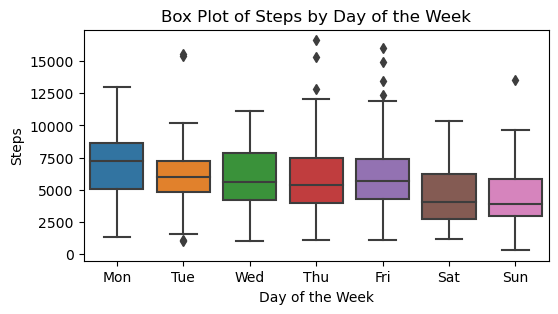

In [86]:
stepsData_df['Day_of_week'] = stepsData_df.index.dayofweek

plt.figure(figsize=(6, 3))
sns.boxplot(data=stepsData_df, x='Day_of_week', y='Actual')
plt.title('Box Plot of Steps by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Steps')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

 ### Scatter Plot showing the daily steps vs the steps Goals  

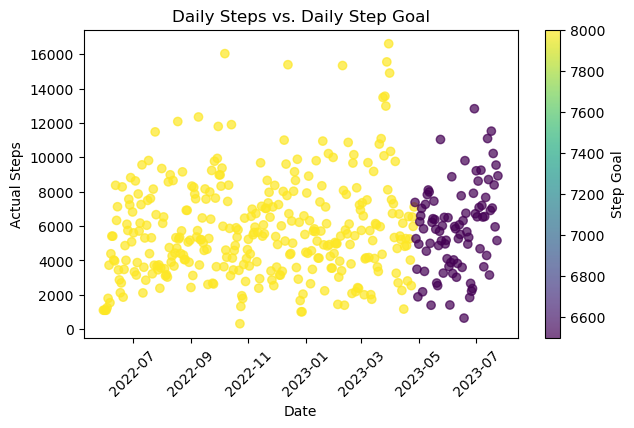

In [87]:
plt.figure(figsize=(7, 4))
plt.scatter(stepsData_df.index, stepsData_df['Actual'], c=stepsData_df['Goal'], cmap='viridis', alpha=0.7)
plt.title('Daily Steps vs. Daily Step Goal')
plt.xlabel('Date')
plt.ylabel('Actual Steps')
plt.colorbar(label='Step Goal')
plt.xticks(rotation=45)
plt.show()

### Correlation

In [88]:
correlation_matrix = stepsData_df.corr()

### Visualizing correlation

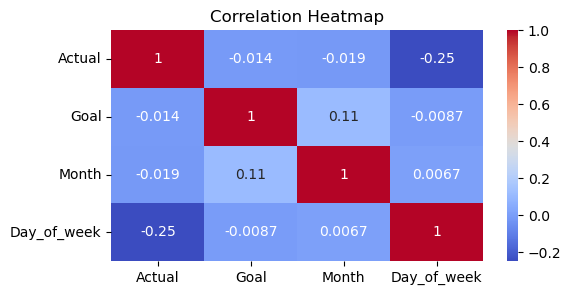

In [89]:
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Descriptive statistics

In [90]:
stepsData_df.describe()

,Actual,Goal,Month,Day_of_week
count,420.000000,420.000000,420.000000,420.000000
mean,5799.726190,7682.142857,6.511905,3.000000
std,2801.384844,613.717635,3.223919,2.002385
min,316.000000,6500.000000,1.000000,0.000000
25%,3731.250000,8000.000000,4.000000,1.000000
50%,5417.500000,8000.000000,6.000000,3.000000
75%,7362.250000,8000.000000,9.000000,5.000000
max,16611.000000,8000.000000,12.000000,6.000000


In [91]:
mean_steps = stepsData_df['Actual'].mean()

In [92]:
print("The Mean of the Daily steps:", mean_steps)

The Mean of the Daily steps: 5799.726190476191


In [93]:
median_steps = stepsData_df['Actual'].median()

In [94]:
print("Median of the Daily steps:", median_steps)

Median of the Daily steps: 5417.5


In [95]:
std_deviation_steps = stepsData_df['Goal'].std()

In [96]:
print("Standard Deviation of Steps:", std_deviation_steps)

Standard Deviation of Steps: 613.7176347081135


In [97]:
steps_Var =stepsData_df.var(ddof =0)

In [98]:
print("Variance of Steps (with ddof=0):", steps_Var)

Variance of Steps (with ddof=0): Actual         7.829072e+06
Goal           3.757526e+05
Month          1.036891e+01
Day_of_week    4.000000e+00
dtype: float64


In [99]:
mode_steps = stepsData_df['Actual'].mode()

In [100]:
print("Mode of the  Steps:", mode_steps)

Mode of the  Steps: 0    1102.0
Name: Actual, dtype: float64


## 3. Testing for seasonality and if the data is stationary

### Checking seasonal decomposition

In [101]:
resampled_data = stepsData_df.resample('D').sum()

In [102]:
decomResult = seasonal_decompose(resampled_data['Actual'], model='additive')

### Showing the decomposed components

<Figure size 700x500 with 0 Axes>

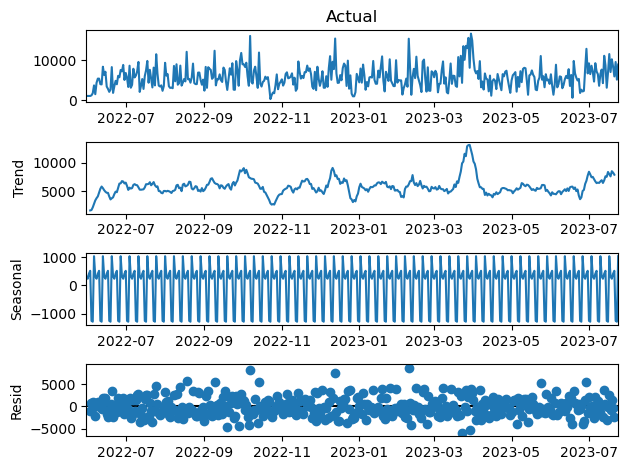

In [103]:
plt.figure(figsize=(7, 5))
decomResult.plot()
plt.show()

### Augmented Dickey-Fuller test to test if the data is stationary

In [104]:
adf_check = adfuller(stepsData_df['Actual'])
print("ADF Test value:", adf_check[1])

ADF Test value: 7.529049756744497e-05


### Differencing the data if not stationary

In [105]:
stepsData_df['Differenced'] = stepsData_df['Actual'].diff().dropna()

## 4. Model selection

In [106]:
modelSelected = ARIMA(stepsData_df['Actual'], order=(5, 1, 0))
model_fit = modelSelected.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Actual   No. Observations:                  420
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3913.014
Date:                Wed, 23 Aug 2023   AIC                           7838.027
Time:                        21:19:23   BIC                           7862.254
Sample:                    05-31-2022   HQIC                          7847.604
                         - 07-24-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7389      0.047    -15.561      0.000      -0.832      -0.646
ar.L2         -0.5481      0.058     -9.411      0.000      -0.662      -0.434
ar.L3         -0.3958      0.067     -5.868      0.0

## 5. Forecasting

### Visualisations of the actual vs the forecasted steps from 25-06-2023 to 25-07-2023

In [134]:
forecast_start_date = '2023-06-25'
forecast_end_date = '2023-07-25'
forecast_index = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')
forecast_steps = model_fit.forecast(steps=len(forecast_index), alpha=0.05)

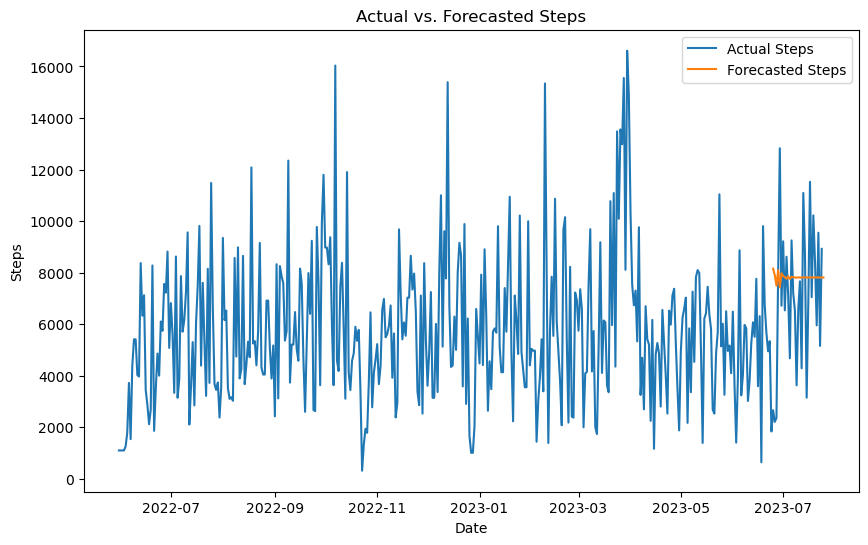

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(stepsData_df.index, stepsData_df['Actual'], label='Actual Steps')
plt.plot(forecast_index, forecast_steps, label='Forecasted Steps')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.title('Actual vs. Forecasted Steps')
plt.legend()
plt.show()

## Testing how close forecasted data is to actual data

### Getting the actual data for the forecast period

In [136]:
actual_forecast_data = stepsData_df.loc[forecast_start_date:forecast_end_date, 'Actual']

### Making sure that forecasted steps and actual data have the same length

In [137]:
if len(forecast_steps) != len(actual_forecast_data):
    # Adjusting the forecasted steps to match the length of actual data
    forecast_steps = forecast_steps[:len(actual_forecast_data)]

### Calculate Mean Squared Error

In [138]:
mse = mean_squared_error(stepsData_df[forecast_start_date:forecast_end_date]['Actual'], forecast_steps)

### Round off the MSE to 2 decimal places

In [139]:
rounded_mse = round(mse, 2)

In [140]:
print("Mean Squared Error:",rounded_mse)

Mean Squared Error: 7963992.11


## Reflections 

### Decision-making process

#### The first thing I did was to prepare the data, by looping through the CSV files, concatinating them into a single DataFrame. In that I made sure that every dataset is captured. 
#### Then handling missing data, then rounding off the Actual values, for consistency.
#### I used EDA to represent the visual distriputions, relationships and patterns of the data.
#### Chose the ARIMA model for seasonal decomposition, modelling and forecasting for this type of data, it is conventional.
#### The MSE shows the performance of the model. It also helps with the assessment of the prediction's accuracy.

### What I learnt from the data

#### I got knowledge about patterns and trends shown through EDA, showing that there were different variations and flactuations of the daily steps over time. 
#### Seasonality showed recurring trends through seasonal decomposition, which relates to the activity levels of the individual. These results can be used to tailor make fitness routines to align with the cycles.
#### Lastly I learnt that, the Mean Squared Error quantifies how close the forecasted data matches the actual data. The comparison of forecasted and actual steps shows how the model is effective in capturing the underlying trends and patterns in the data.

### What I will do differently next time

#### After everything here, there are take homes.  Next time I must try do the experiment with different ARIMA parameter combinations or maybe an automated one that will select optimal techniques, since this one was more of a trial and error.

#### I must also explore how to use other time series models to see how they compare with ARIMA, and also, there must be cross-evaluation in between. Or I must be able to using models that can interconnect to each other so that we give the most optimal results.

#### And also I must get more clarity if values in 'Actual' must be rounded off or what because that can affect the outcome of the results, but it is domain specific. And also, I can add more comments that clearly define the task that is at hand, for people to understand step by step.

#### I should also encourage other's and myself that documentation is very important , every analysis or process that I do, I have to document it. It will also assist other people in the future. And I can implement more annotations, trend lines and labels on the visualisations for better communication.